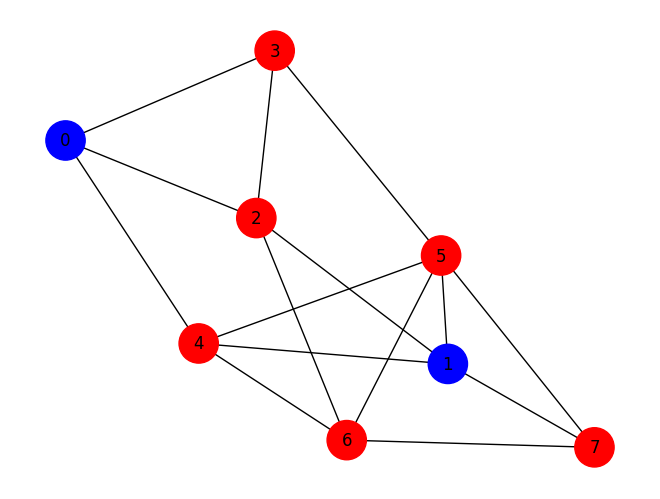

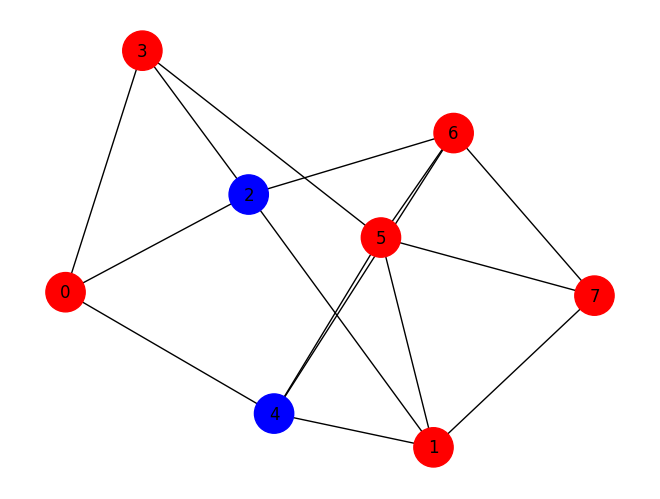

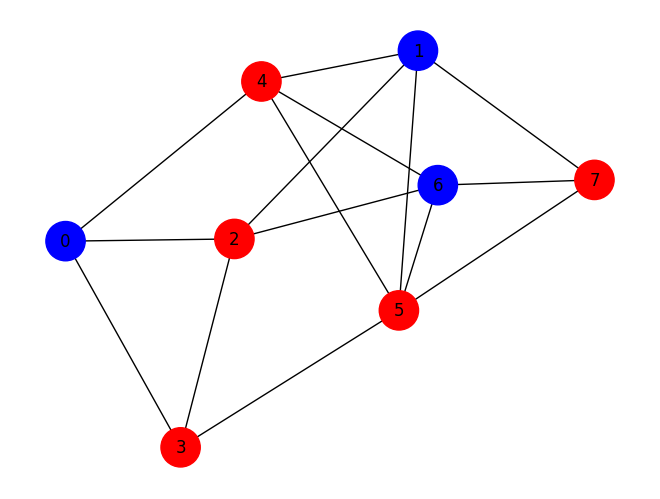

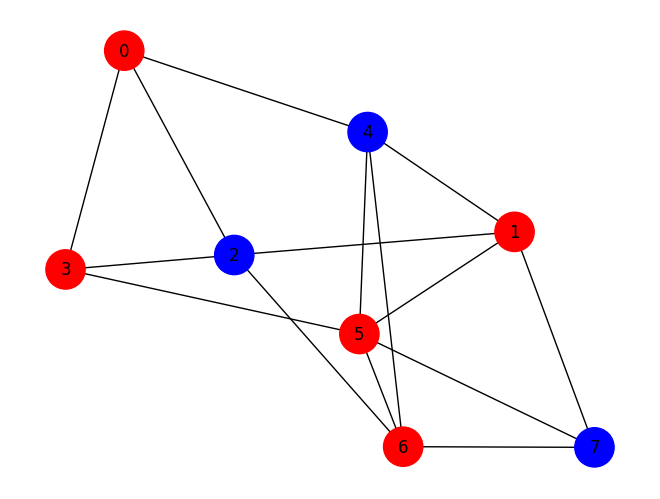

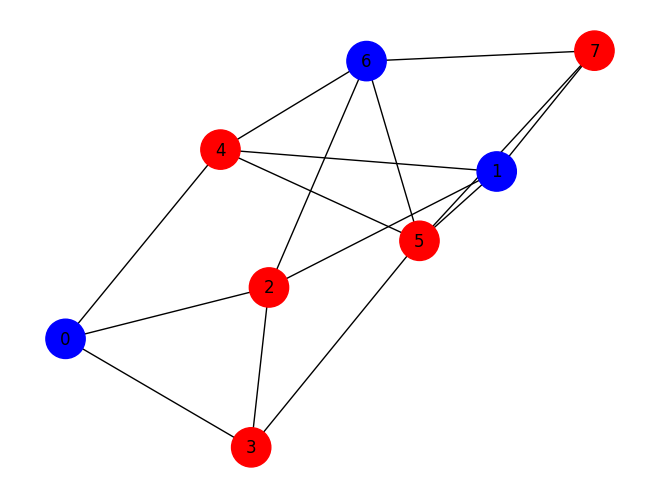

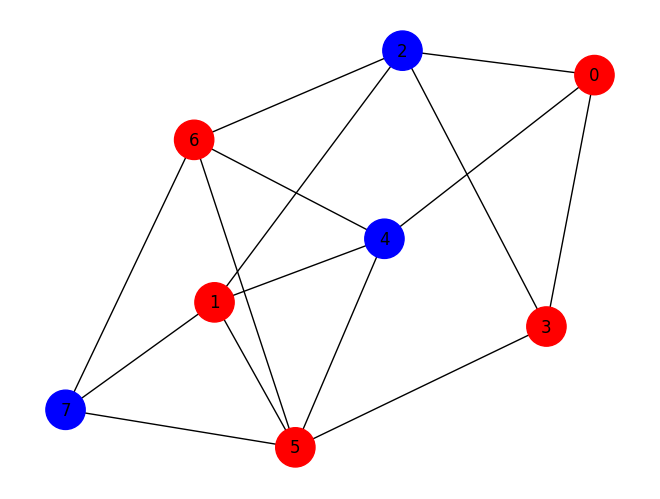

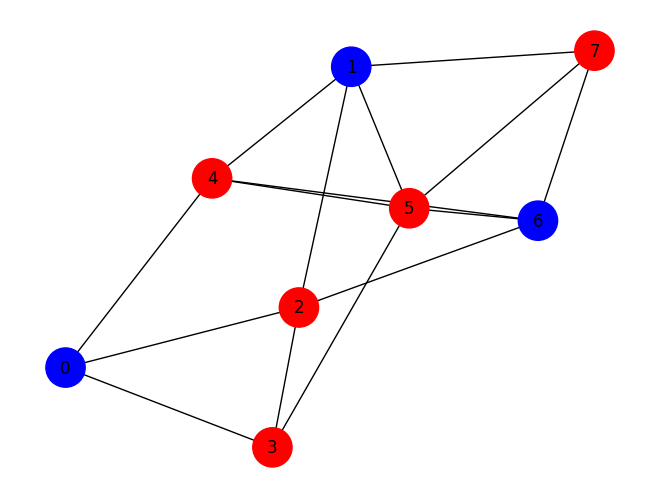

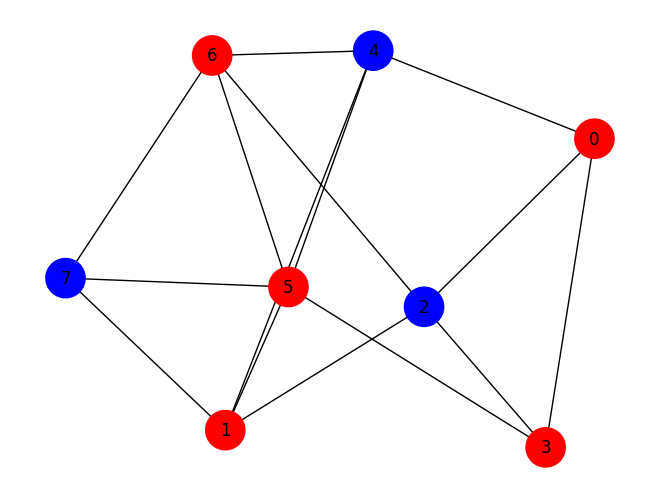

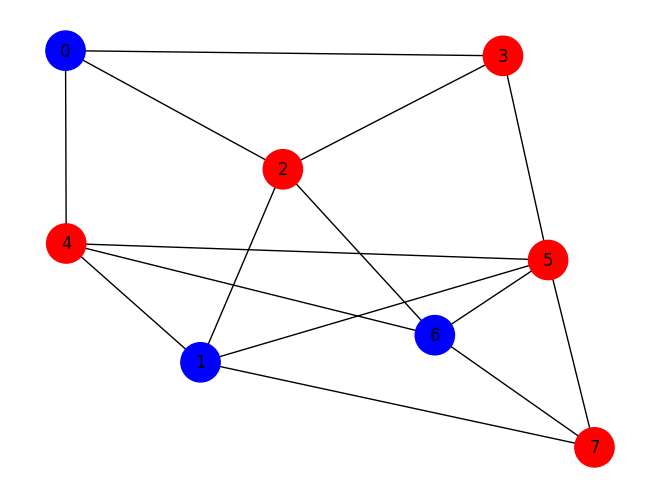

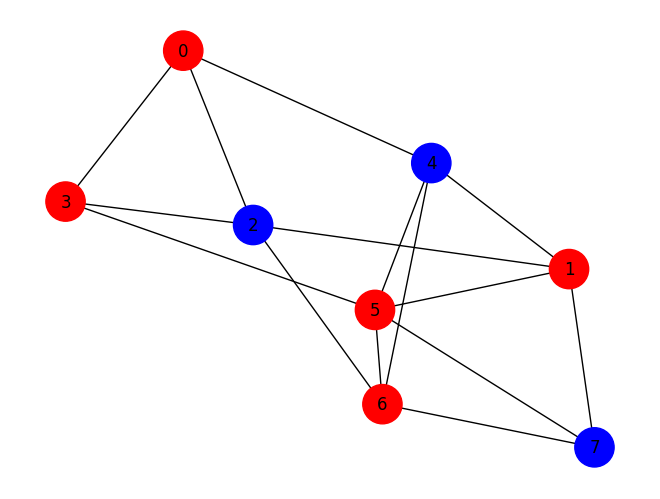

Cascade complete! Final actions: ['A', 'A', 'B', 'B', 'B', 'B', 'A', 'B']


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Set all nodes to initial state 'B'
def set_all_B(G):
    for i in G.nodes():
        G.nodes[i]['action'] = 'B'

# Set initial adopters to state 'A'
def set_A(G, adopters):
    for i in adopters:
        G.nodes[i]['action'] = 'A'

# Map node actions to colors for plotting
def get_colors(G):
    return ['blue' if G.nodes[i]['action'] == 'A' else 'red' for i in G.nodes()]

# Perform a single update step: decide action by comparing A/B payoffs in neighbors
def recalculate(G, payoff_A=4, payoff_B=3):
    action_update = {}
    for i in G.nodes():
        count_A = count_B = 0
        for neighbor in G.neighbors(i):
            if G.nodes[neighbor]['action'] == 'A':
                count_A += 1
            else:
                count_B += 1
        if payoff_A * count_A >= payoff_B * count_B:
            action_update[i] = 'A'
        else:
            action_update[i] = 'B'
    return action_update

# Apply new actions to all nodes
def reset_node_attributes(G, action_dict):
    for i, a in action_dict.items():
        G.nodes[i]['action'] = a

# Run the cascade process and show at each stage
def run_cascade(G, initial_adopters, steps=10):
    set_all_B(G)
    set_A(G, initial_adopters)
    for _ in range(steps):
        plt.figure()
        nx.draw(G, with_labels=True, node_color=get_colors(G), node_size=800)
        plt.show()
        actions = recalculate(G)
        if all(G.nodes[i]['action'] == actions[i] for i in G.nodes()):
            # No more change, cascade done
            break
        reset_node_attributes(G, actions)
    print("Cascade complete! Final actions:", [G.nodes[i]['action'] for i in G.nodes()])

# Example:
G = nx.erdos_renyi_graph(8, 0.4, seed=42)
run_cascade(G, initial_adopters=[0, 1])
